<a href="https://colab.research.google.com/github/Vandan37/RCE_SK_Project/blob/main/Weed_recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
  import os
X_train = []
y_train = []                                                                                                                                                                                                                                               
import cv2
for i in os.listdir('/content/drive/My Drive/vndn_1/plant-seedlings-classification/train'):
    print(i)
    if (os.path.isdir('/content/drive/My Drive/vndn_1/plant-seedlings-classification/train/' + i)):
        for j in os.listdir('/content/drive/My Drive/vndn_1/plant-seedlings-classification/train/' + i):
            try:
                dummy = cv2.imread('/content/drive/My Drive/vndn_1/plant-seedlings-classification/train/' + i + '/' + j)
                dummy = cv2.resize(dummy,(128,128))
                X_train.append(dummy)
                y_train.append(i)
            except Exception as e:
                print(e)

Black-grass
Charlock
Cleavers
Common Chickweed
Fat Hen
Common wheat
Scentless Mayweed
Loose Silky-bent
Maize
Sugar beet
Shepherds Purse
Small-flowered Cranesbill


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt                        
# %matplotlib inline 
# plt.figure(figsize=(10,5))
# chart = sns.countplot(
#     data=y_train,
#     x=species
# )
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [ ]:
#Converting the list to numpy array
import numpy as np
X_train1 = np.array(X_train)
y_train1 = np.array(y_train)

In [ ]:
#Converting the named categorical labels to one-hot encoded format
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
y_train2 = lenc.fit_transform(y_train1)
import tensorflow as tf
y_train1 = tf.keras.utils.to_categorical(y_train2)

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_vl,y_tr,y_vl = train_test_split(X_train1,y_train1)

In [ ]:
#Here we're fetching the test images
X_test = []
import cv2
for i in os.listdir('/content/drive/My Drive/vndn_1/plant-seedlings-classification/test'):
    dummy = cv2.imread('/content/drive/My Drive/vndn_1/plant-seedlings-classification/test/' + i)
    dummy = cv2.resize(dummy, (128,128))
    X_test.append(dummy)

In [ ]:
X_test1 = np.array(X_test)

In [ ]:
#Using layers module
from tensorflow.keras import layers

#Using the sequential module to define a model sequentially/in a sequential manner
from tensorflow.keras.models import Sequential
model = Sequential()

In [ ]:
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(12,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Training the model
model.fit(X_train1,y_train1,epochs=15,batch_size=100)

Epoch 1/15
48/48 [==============================] - 62s 1s/step - loss: 0.2198 - accuracy: 0.9326
Epoch 2/15
48/48 [==============================] - 65s 1s/step - loss: 0.2492 - accuracy: 0.9295
Epoch 3/15
48/48 [==============================] - 64s 1s/step - loss: 0.2079 - accuracy: 0.9345
Epoch 4/15
48/48 [==============================] - 63s 1s/step - loss: 0.1786 - accuracy: 0.9459
Epoch 5/15
48/48 [==============================] - 62s 1s/step - loss: 0.1430 - accuracy: 0.9547
Epoch 6/15
48/48 [==============================] - 63s 1s/step - loss: 0.1450 - accuracy: 0.9596
Epoch 7/15
48/48 [==============================] - 63s 1s/step - loss: 0.1425 - accuracy: 0.9600
Epoch 8/15
48/48 [==============================] - 63s 1s/step - loss: 0.1478 - accuracy: 0.9566
Epoch 9/15
48/48 [==============================] - 62s 1s/step - loss: 0.1317 - accuracy: 0.9596
Epoch 10/15
48/48 [==============================] - 63s 1s/step - loss: 0.1307 - accuracy: 0.9608
Epoch 11/15
48/48 [

In [ ]:
model.fit(x_tr,y_tr,validation_data=(x_vl,y_vl),epochs=15,batch_size=100)

Epoch 1/15
36/36 [==============================] - 53s 1s/step - loss: 0.1386 - accuracy: 0.9627 - val_loss: 1.9667 - val_accuracy: 0.7256
Epoch 2/15
36/36 [==============================] - 53s 1s/step - loss: 0.1104 - accuracy: 0.9672 - val_loss: 0.3159 - val_accuracy: 0.9301
Epoch 3/15
36/36 [==============================] - 51s 1s/step - loss: 0.0897 - accuracy: 0.9747 - val_loss: 0.1012 - val_accuracy: 0.9806
Epoch 4/15
36/36 [==============================] - 52s 1s/step - loss: 0.0964 - accuracy: 0.9759 - val_loss: 0.3689 - val_accuracy: 0.9175
Epoch 5/15
36/36 [==============================] - 52s 1s/step - loss: 0.1187 - accuracy: 0.9694 - val_loss: 0.1769 - val_accuracy: 0.9731
Epoch 6/15
36/36 [==============================] - 51s 1s/step - loss: 0.1176 - accuracy: 0.9683 - val_loss: 1.0353 - val_accuracy: 0.7896
Epoch 7/15
36/36 [==============================] - 52s 1s/step - loss: 0.0988 - accuracy: 0.9770 - val_loss: 0.1412 - val_accuracy: 0.9621
Epoch 8/15
36/36 [==

In [ ]:
#Evaluating the model
loss, acc = model.evaluate(X_train1,y_train1)
print(loss,acc)

149/149 [==============================] - 19s 128ms/step - loss: 0.0823 - accuracy: 0.9775
0.08225267380475998 0.9774736762046814


In [ ]:
#we predict the class using the trained model
y_pred = model.predict(X_test1)

In [ ]:
out = []
for i in y_pred:
  #This helps to find the position at which the value is maximum
  out.append(np.argmax(i))
print(out)  

[10, 0, 0, 3, 6, 3, 5, 6, 6, 3, 11, 10, 6, 8, 6, 6, 8, 8, 5, 2, 5, 10, 5, 9, 11, 7, 8, 10, 5, 5, 3, 9, 6, 6, 8, 6, 6, 11, 8, 7, 6, 5, 10, 7, 6, 3, 6, 6, 10, 1, 8, 6, 5, 8, 2, 7, 5, 6, 0, 7, 2, 1, 6, 6, 6, 6, 6, 10, 2, 8, 10, 6, 3, 5, 2, 5, 6, 3, 3, 9, 9, 6, 5, 6, 5, 5, 6, 1, 3, 5, 5, 6, 2, 6, 6, 6, 8, 5, 0, 11, 6, 8, 0, 5, 6, 1, 5, 8, 6, 6, 3, 1, 2, 2, 2, 2, 9, 9, 11, 6, 1, 5, 6, 2, 0, 11, 11, 1, 1, 6, 4, 6, 8, 4, 6, 10, 5, 6, 10, 6, 3, 6, 3, 8, 5, 6, 6, 5, 6, 1, 7, 10, 6, 6, 10, 6, 5, 10, 6, 6, 3, 2, 6, 6, 7, 9, 5, 2, 3, 9, 0, 9, 5, 6, 3, 4, 6, 0, 6, 10, 6, 6, 6, 6, 0, 6, 5, 5, 6, 1, 0, 1, 6, 6, 4, 6, 10, 6, 5, 6, 9, 1, 6, 10, 2, 6, 1, 9, 10, 7, 9, 6, 6, 6, 6, 2, 2, 3, 6, 3, 5, 6, 10, 8, 3, 6, 6, 10, 5, 0, 6, 6, 8, 6, 2, 2, 7, 2, 1, 9, 6, 1, 10, 7, 6, 10, 2, 10, 6, 6, 3, 6, 0, 3, 7, 6, 5, 6, 6, 3, 10, 7, 2, 2, 10, 6, 2, 10, 1, 9, 6, 9, 4, 10, 10, 6, 6, 2, 2, 6, 6, 3, 7, 5, 6, 5, 6, 5, 5, 3, 7, 6, 7, 6, 1, 8, 5, 6, 10, 6, 6, 6, 10, 9, 2, 5, 2, 2, 4, 9, 2, 6, 0, 2, 6, 5, 8, 6, 11, 1, 6,

In [ ]:
#@title Default title text
#To get the labels back in their original form
out = lenc.inverse_transform(out)

In [ ]:
a=[]
for i in os.listdir('/content/drive/My Drive/vndn_1/plant-seedlings-classification/test'):
    print(i)
    a.append(i)

0021e90e4.png
003d61042.png
007b3da8b.png
0086a6340.png
00d090cde.png
00ef713a8.png
00c47e980.png
01291174f.png
026716f9b.png
03566743d.png
03e322a29.png
03a2ee656.png
02cfeb38d.png
03ef36742.png
0437393b1.png
043449b0b.png
05341a8a6.png
04814f36d.png
060450d79.png
060f1dc84.png
0625f063b.png
063363305.png
071cb3ece.png
06d12f6fa.png
0751c0bbc.png
07e62f903.png
0885e7690.png
089ad62a7.png
085974290.png
08d591441.png
0911d3dee.png
099b961ec.png
0a64e3e6c.png
0bf7bfb05.png
0ad9e7dfb.png
0c27cf05f.png
0ae6668fa.png
0dba99002.png
0e8492cb1.png
0ebf8f2f4.png
0c4199daa.png
0c45ace27.png
0d31e6602.png
0c51bf229.png
0caeda5df.png
0d117d910.png
0c5f6c493.png
115f93ecc.png
0fb233ad6.png
126a71ce0.png
0f6cbe5e8.png
11d3f68ff.png
12625488b.png
0ee4ad224.png
1191ba346.png
122913909.png
116b136de.png
16467a950.png
13b9fa92d.png
1541bdb2e.png
1364b297a.png
148bbda66.png
1376f3b63.png
1459e96a0.png
1623fb9e1.png
14bb43eee.png
16357b436.png
1312065a5.png
1694a70e4.png
17529c555.png
16fd2e01a.png
17a78f

In [ ]:
import pandas as pd
#Creating a dataframe & exporting in the csv file format with images & labels columns
results = {'Labels':out,'Images':a}
results = pd.DataFrame(results)

In [ ]:
#Checking the dataframe
results.head(23)

,Labels,Images
0,Small-flowered Cranesbill,0021e90e4.png
1,Black-grass,003d61042.png
2,Black-grass,007b3da8b.png
3,Common Chickweed,0086a6340.png
4,Loose Silky-bent,00d090cde.png
5,Common Chickweed,00ef713a8.png
6,Fat Hen,00c47e980.png
7,Loose Silky-bent,01291174f.png
8,Loose Silky-bent,026716f9b.png
9,Common Chickweed,03566743d.png


In [ ]:
#Exporting the dataset to csv
results.to_csv('results.csv')

In [ ]:
from PIL import Image
im = Image.open("/content/drive/MyDrive/vndn_1/plant-seedlings-classification/test/0437393b1.png")
im.show()
im2 = Image.open("/content/drive/MyDrive/vndn_1/plant-seedlings-classification/test/01291174f.png")

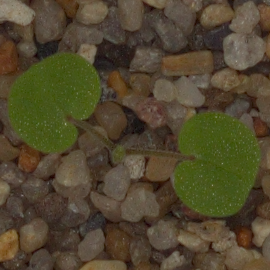

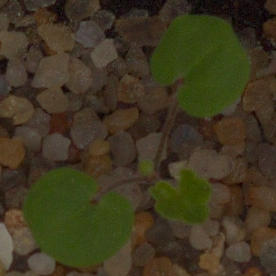

In [ ]:
display(im, im2)



# New Section

In [ ]:
print(out)

['Small-flowered Cranesbill' 'Loose Silky-bent' 'Loose Silky-bent'
 'Common Chickweed' 'Loose Silky-bent' 'Common Chickweed'
 'Loose Silky-bent' 'Loose Silky-bent' 'Loose Silky-bent'
 'Common Chickweed' 'Small-flowered Cranesbill'
 'Small-flowered Cranesbill' 'Loose Silky-bent' 'Scentless Mayweed'
 'Loose Silky-bent' 'Loose Silky-bent' 'Scentless Mayweed'
 'Scentless Mayweed' 'Shepherds Purse' 'Charlock' 'Common Chickweed'
 'Small-flowered Cranesbill' 'Loose Silky-bent' 'Shepherds Purse'
 'Scentless Mayweed' 'Cleavers' 'Scentless Mayweed'
 'Small-flowered Cranesbill' 'Shepherds Purse' 'Scentless Mayweed'
 'Common Chickweed' 'Small-flowered Cranesbill' 'Loose Silky-bent'
 'Loose Silky-bent' 'Scentless Mayweed' 'Loose Silky-bent'
 'Loose Silky-bent' 'Scentless Mayweed' 'Scentless Mayweed'
 'Small-flowered Cranesbill' 'Loose Silky-bent' 'Common Chickweed'
 'Small-flowered Cranesbill' 'Scentless Mayweed' 'Loose Silky-bent'
 'Scentless Mayweed' 'Small-flowered Cranesbill' 'Loose Silky-bent'